# 5' UTR analysis for the genes which Up-Down/Down-Up 
<font color="orange"> <b>This analysis is different from the fig5_5utr_length. <br> <br>In this anlysis I will use Up-Down/Down-Up genes excusively for each comparisons. I will not select genes based on <u>*setdiff*</u> as in previous analysis. I have use all genes which are Up-Down/Down-Up in RNA-seq or Ribo-seq not only in one. So, I will use all genes Up-Down/Down-Up genes in all analysis for gene length and first exon length*. 
<br> <br>Note: *<u>Perform first exon length analysis for the Up-Down/Down-Up genes. </u></b>

## <font color='blue'>Load R library

In [1]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
suppressMessages(suppressWarnings(library('readxl')))
suppressMessages(suppressWarnings(library('openxlsx')))
suppressMessages(suppressWarnings(library('GenomicFeatures')))
suppressMessages(suppressWarnings(library('dplyr')))
suppressMessages(suppressWarnings(library('rtracklayer')))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(ggprism)))
suppressMessages(suppressWarnings(library(patchwork)))
suppressMessages(suppressWarnings(library(magrittr)))
suppressMessages(suppressWarnings(library(ggpubr)))

## <font color="blue"> Global parameters

In [2]:
th_adj_pvalue <- 0.05
th_log2fc <- log2(1.2)

## <font color='blue'>Load data for the analysis and plot

In [3]:
load(file = "..//gene_length.rds")
results <- read.xlsx("./xlsx/170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna/170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna_protein_coding.xlsx", sheet = "all", rowNames = TRUE)
results.selected <- results[,c('unt.tgfb.DEtranscription','tgfb.tgfbCX5461.DEtranscription','reversible.transcription', 'unt.tgfb.DEtranslation','tgfb.tgfbCX5461.DEtranslation','reversible.translation')]
results.score <- results[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription', 'log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription', 'log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation', 'log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
head(results.score)

,log2FCuntVStgfb.transcription,FDRuntVStgfb.transcription,log2FCtgfbVStgfbCX5461.transcription,FDRtgfbVStgfbCX5461.transcription,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610009B22Rik,-0.04158431,8.658629e-01,0.254406206,0.47845885,-0.4414281,0.30541555,1.02171324,0.02919136
0610010F05Rik,0.36131693,8.558582e-03,-0.396958965,0.04148518,0.3259794,0.64123254,-0.78689319,0.41800085
0610010K14Rik,-0.65750941,1.465000e-03,-0.118178034,0.79854067,-1.4347083,0.05167993,1.51410985,0.07704533
0610012G03Rik,-0.01120375,9.284910e-01,-0.000463367,0.99821843,-0.5530121,0.13823240,0.01520704,0.98121037
0610030E20Rik,-0.18356050,2.586286e-01,-0.023394823,0.94973859,NA,NA,NA,NA
0610040J01Rik,-3.61580842,1.100000e-10,1.034395317,0.16393562,-0.9502349,0.49047068,-0.14445185,0.95563779


## <font color='blue'>5' UTR length of genes from GENCODE GTF file

In [4]:
# 5' UTR length https://www.biostars.org/p/4869/
ensemble_gtf <- makeTxDbFromGFF('Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz', organism = "Mus musculus")
fiveUTRs          <- fiveUTRsByTranscript(ensemble_gtf,use.names=TRUE)
length_fiveUTRs   <- width(ranges(fiveUTRs))
the_lengths        <- as.data.frame(length_fiveUTRs)
the_lengths        <- the_lengths %>% group_by(group, group_name) %>% summarise(sum(value))
the_lengths        <- unique(the_lengths[,c("group_name", "sum(value)")])
colnames(the_lengths) <- c("ENST", "5' UTR Length")
the_lengths <- as.data.frame(the_lengths)

# Read GTF and make ENSG and ENST information for each genes
GTF="Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz"
GTF <- import(GTF)
GRCm39.104.gtf <- as.data.frame(GTF)

GRCm39.104.selected <- GRCm39.104.gtf %>%
  filter(type=="gene") %>%
  rename(Chr=seqnames, Type=type,ENSG=gene_id, Symbol=gene_name, GeneType=gene_biotype, GeneLength=width) %>%
  select(Chr, Type, GeneType, ENSG, Symbol, GeneLength) 

GRCm39.104.ENST <- GRCm39.104.gtf %>%
  rename(ENSG=gene_id, ENST=transcript_id, Symbol=gene_name) %>%
  select(ENSG, ENST, Symbol) %>%
  tidyr::drop_na()%>%  #filter(!is.na(ENST)) ##Both filter/is.na will work
  distinct()

# Make final file
UTR_Length <- merge(GRCm39.104.ENST, the_lengths, by ="ENST")
head(UTR_Length, 25)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



,ENST,ENSG,Symbol,5' UTR Length
,<chr>,<chr>,<chr>,<int>
1,ENSMUST00000000001,ENSMUSG00000000001,Gnai3,141
2,ENSMUST00000000003,ENSMUSG00000000003,Pbsn,140
3,ENSMUST00000000010,ENSMUSG00000020875,Hoxb9,85
4,ENSMUST00000000028,ENSMUSG00000000028,Cdc45,313
5,ENSMUST00000000033,ENSMUSG00000048583,Igf2,115
6,ENSMUST00000000049,ENSMUSG00000000049,Apoh,51
7,ENSMUST00000000058,ENSMUSG00000000058,Cav2,176
8,ENSMUST00000000080,ENSMUSG00000000078,Klf6,157
9,ENSMUST00000000087,ENSMUSG00000000085,Scmh1,433


<font color="purple"> **<u>UTR length issues**</u> <br></font>
**Most of the genes have multiple transcript, and each transcript have different UTR length. To overcome with this issues I have to use single transcripts' UTR length. <br>Here I am using longest transcript of genes for the UTR length. Hyunsoo also used UTR length of the largest transcript for each genes.** <br>
In previous cell I also generated file for the 5'UTR length. But that file have some issues, few genes have multiple transcript

In [5]:
txdb <- makeTxDbFromGFF("Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz",format="gtf", organism = "Mus musculus")
Transcript_Length <- transcriptLengths(txdb, with.cds_len=TRUE, with.utr5_len=TRUE, with.utr3_len=TRUE) %>%
                                       group_by(gene_id) %>%
                                       slice(which.max(cds_len)) #%>% # It's not sure either largest transcript [slice(which.max(tx_len))] is canonical transcript.
                                       #http://seqanswers.com/forums/archive/index.php/t-63408.html
                                       #filter(utr5_len >0)

gtf <- rtracklayer::import("Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz")
gencode.v39.gtf <- as.data.frame(gtf)
gencode.v39.gtf.selected <- gencode.v39.gtf %>%
  filter(type=="gene") %>%
  rename(Chr= seqnames, Type= type, Gene = gene_id, GeneType=gene_biotype, Symbol= gene_name, Length=width, Start = start, End=end, Strand=strand) %>%
  select(Gene, Symbol,  Chr, Start, End, Strand,  GeneType, Length)

Transcript_UTR_Length <- merge(gencode.v39.gtf.selected, Transcript_Length, by.x="Gene", by.y= "gene_id")
head(Transcript_Length, 5)

## Genes with gene symbol
Transcript_UTR_Length <- Transcript_UTR_Length[rowSums(is.na(Transcript_UTR_Length)) == 0,] %>%# is.na < 0 if Symbol is NA
    filter(GeneType=="protein_coding")
head(Transcript_UTR_Length, 5)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



tx_id,tx_name,gene_id,nexon,tx_len,cds_len,utr5_len,utr3_len
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
25486,ENSMUST00000000001,ENSMUSG00000000001,9,3262,1065,141,2056
138799,ENSMUST00000000003,ENSMUSG00000000003,7,902,525,140,237
118322,ENSMUST00000000028,ENSMUSG00000000028,20,2143,1701,313,129
63417,ENSMUST00000136359,ENSMUSG00000000031,5,2286,0,0,0
137452,ENSMUST00000077375,ENSMUSG00000000037,26,3550,2910,213,427


,Gene,Symbol,Chr,Start,End,Strand,GeneType,Length,tx_id,tx_name,nexon,tx_len,cds_len,utr5_len,utr3_len
,<chr>,<chr>,<fct>,<int>,<int>,<fct>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000000001,Gnai3,3,108014596,108053462,-,protein_coding,38867,25486,ENSMUST00000000001,9,3262,1065,141,2056
2,ENSMUSG00000000003,Pbsn,X,76881507,76897229,-,protein_coding,15723,138799,ENSMUST00000000003,7,902,525,140,237
3,ENSMUSG00000000028,Cdc45,16,18599197,18630737,-,protein_coding,31541,118322,ENSMUST00000000028,20,2143,1701,313,129
4,ENSMUSG00000000037,Scml2,X,159865521,160041209,+,protein_coding,175689,137452,ENSMUST00000077375,26,3550,2910,213,427
5,ENSMUSG00000000049,Apoh,11,108234180,108305222,+,protein_coding,71043,88412,ENSMUST00000000049,8,1190,1038,51,101


## <font color='blue'>Gene length file
<font color='magenta'> <b>This GTF file is downloaded from UCSC genome browser as guggested in RSeqc package webpage https://sourceforge.net/projects/rseqc/files/BED/ <br>
To get the most recent annotation and gene models I used UCSC's Table Browser https://genome.ucsc.edu/cgi-bin/hgTables?command=start</b>

In [6]:
txdb <- makeTxDbFromGFF("Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz",format="gtf")
# then collect the exons per gene id
exons.list.per.gene <- exonsBy(txdb,by="gene")
# then for each gene, reduce all the exons to a set of non overlapping exons, calculate their lengths (widths) and sum then
exonic.gene.sizes <- sum(width(reduce(exons.list.per.gene)))
gene.exon.counts <- lengths(exons.list.per.gene)
gene.info <- cbind(exonic.gene.sizes, gene.exon.counts)
colnames(gene.info) <- c("exon_length", "exon_number")


gtf <- rtracklayer::import("Mus_musculus.GRCm39.104.rdna_rn18s.gtf.gz")
gencode.v39.gtf <- as.data.frame(gtf)
gencode.v39.gtf.selected <- gencode.v39.gtf %>%
  filter(type=="gene") %>%
  rename(Chr= seqnames, Type= type, Gene = gene_id, GeneType=gene_biotype, Symbol= gene_name, Length=width, Start = start, End=end, Strand=strand) %>%
  select(Gene, Symbol,  Chr, Start, End, Strand,  GeneType, Length) #%>%
#filter(!grepl("chrM",Chr))

gene.info <- merge(gencode.v39.gtf.selected, gene.info, by.x="Gene", by.y= "row.names")
head(gene.info)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



,Gene,Symbol,Chr,Start,End,Strand,GeneType,Length,exon_length,exon_number
,<chr>,<chr>,<fct>,<int>,<int>,<fct>,<chr>,<int>,<int>,<int>
1,ENSMUSG00000000001,Gnai3,3,108014596,108053462,-,protein_coding,38867,3262,9
2,ENSMUSG00000000003,Pbsn,X,76881507,76897229,-,protein_coding,15723,902,9
3,ENSMUSG00000000028,Cdc45,16,18599197,18630737,-,protein_coding,31541,3506,25
4,ENSMUSG00000000031,H19,7,142129266,142131880,-,lncRNA,2615,2460,20
5,ENSMUSG00000000037,Scml2,X,159865521,160041209,+,protein_coding,175689,6397,50
6,ENSMUSG00000000049,Apoh,11,108234180,108305222,+,protein_coding,71043,1594,16


## <font color='blue'> First exon length
<font color="magenta"> <b> This part of code is for getting length of the first exon of each genes, adopted by using this GeneStructureTools vignette https://www.bioconductor.org/packages/release/bioc/vignettes/GeneStructureTools/inst/doc/Vignette.html</b>

In [7]:
exons <- gtf[gtf$type=="exon"]
transcripts <- gtf[gtf$type=="transcript"]

# add first/last annotation (speeds up later steps)
if(!("first_last" %in% colnames(mcols(exons)))){
    t <- as.data.frame(table(exons$transcript_id))
    exons$first_last <- NA
    exons$first_last[exons$exon_number == 1] <- "first exon"
    exons$first_last[exons$exon_number == 
    t$Freq[match(exons$transcript_id, t$Var1)]] <- "last exon"
}

exons <- as.data.frame(exons)
head(exons[grep("first exon", exons$first_last),])

exons <- exons %>%
    rename(Chr= seqnames, Type= type, GeneType=gene_biotype, Symbol= gene_name, Length=width, Start = start, End=end, Strand=strand) %>%
    filter(str_detect("first exon", first_last)) %>%
    group_by(gene_id) %>% 
    filter(row_number()==1) #%>%
    #head(n=10)
head(exons)

,seqnames,start,end,width,strand,source,type,score,phase,gene_id,...,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id,first_last
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,1,151012258,151012971,714,+,havana,exon,NA,NA,ENSMUSG00000097426,...,processed_pseudogene,basic,NA (assigned to previous version 1),1,ENSMUSE00001158900,2,NA,NA,NA,first exon
7,1,75372851,75373007,157,-,havana,exon,NA,NA,ENSMUSG00000086053,...,lncRNA,basic,5 (assigned to previous version 1),1,ENSMUSE00000831723,2,NA,NA,NA,first exon
10,1,6986783,6987219,437,+,havana,exon,NA,NA,ENSMUSG00000102135,...,processed_pseudogene,basic,NA (assigned to previous version 1),1,ENSMUSE00001339810,2,NA,NA,NA,first exon
14,1,43782986,43783055,70,-,havana,exon,NA,NA,ENSMUSG00000100764,...,lncRNA,basic,5 (assigned to previous version 1),1,ENSMUSE00001334242,2,NA,NA,NA,first exon
17,1,151013785,151014385,601,+,havana,exon,NA,NA,ENSMUSG00000102095,...,lncRNA,basic,5 (assigned to previous version 1),1,ENSMUSE00001321121,2,NA,NA,NA,first exon
30,1,7106139,7106616,478,+,havana,exon,NA,NA,ENSMUSG00000103629,...,processed_pseudogene,basic,NA (assigned to previous version 1),1,ENSMUSE00001343950,2,NA,NA,NA,first exon


Chr,Start,End,Length,Strand,source,Type,score,phase,gene_id,...,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id,first_last
<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,151012258,151012971,714,+,havana,exon,NA,NA,ENSMUSG00000097426,...,processed_pseudogene,basic,NA (assigned to previous version 1),1,ENSMUSE00001158900,2,NA,NA,NA,first exon
1,75372851,75373007,157,-,havana,exon,NA,NA,ENSMUSG00000086053,...,lncRNA,basic,5 (assigned to previous version 1),1,ENSMUSE00000831723,2,NA,NA,NA,first exon
1,6986783,6987219,437,+,havana,exon,NA,NA,ENSMUSG00000102135,...,processed_pseudogene,basic,NA (assigned to previous version 1),1,ENSMUSE00001339810,2,NA,NA,NA,first exon
1,43782986,43783055,70,-,havana,exon,NA,NA,ENSMUSG00000100764,...,lncRNA,basic,5 (assigned to previous version 1),1,ENSMUSE00001334242,2,NA,NA,NA,first exon
1,151013785,151014385,601,+,havana,exon,NA,NA,ENSMUSG00000102095,...,lncRNA,basic,5 (assigned to previous version 1),1,ENSMUSE00001321121,2,NA,NA,NA,first exon
1,7106139,7106616,478,+,havana,exon,NA,NA,ENSMUSG00000103629,...,processed_pseudogene,basic,NA (assigned to previous version 1),1,ENSMUSE00001343950,2,NA,NA,NA,first exon


## <font color = "blue"> Up-Down/Down-Up genes

### <font color="green">Up-Down/Down-Up genes in RNA-seq data

#### Control Vs TGFB Transcription

##### Control Vs TGFB Transcription Up (CtrVsTGFbTranscriptionUp)

In [8]:
results.score.up <- results.score[(results.score$log2FCuntVStgfb.transcription >= th_log2fc & results.score$FDRuntVStgfb.transcription <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription')]
CtrVsTGFbTranscriptionUp <- rownames(na.omit(results.score.up))
length(CtrVsTGFbTranscriptionUp)

[1] 3158

##### Control Vs TGFB Transcription Down (CtrVsTGFbTranscriptionDn)

In [9]:
results.score.dn <- results.score[(results.score$log2FCuntVStgfb.transcription <= -th_log2fc & results.score$FDRuntVStgfb.transcription <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription')]
CtrVsTGFbTranscriptionDn <- rownames(na.omit(results.score.dn))
length(CtrVsTGFbTranscriptionDn) 

[1] 3127

##### Control Vs TGFB Transcription Un-changed (CtrVsTGFbTranscriptionUn)

In [10]:
results.score.un <- results.score[(abs(results.score$log2FCuntVStgfb.transcription) < th_log2fc & results.score$FDRuntVStgfb.transcription <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCuntVStgfb.transcription', 'FDRuntVStgfb.transcription')]
CtrVsTGFbTranscriptionUn <- rownames(na.omit(results.score.un))
length(CtrVsTGFbTranscriptionUn)

[1] 763

#### TGFB Vs CX5461 Transcription

##### TGFB Vs  CX5461 Transcription Up (TGFbVsCX5461TranscriptionUp)

In [11]:
results.score.up <- results.score[(results.score$log2FCtgfbVStgfbCX5461.transcription >= th_log2fc & results.score$FDRtgfbVStgfbCX5461.transcription <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription')]
TGFbVsCX5461TranscriptionUp <- rownames(na.omit(results.score.up))
length(TGFbVsCX5461TranscriptionUp)

[1] 511

##### TGFB Vs  CX5461 Transcription Down (TGFbVsCX5461TranscriptionDn)

In [12]:
results.score.dn <- results.score[(results.score$log2FCtgfbVStgfbCX5461.transcription < -th_log2fc & results.score$FDRtgfbVStgfbCX5461.transcription <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription')]
TGFbVsCX5461TranscriptionDn <- rownames(na.omit(results.score.dn))
length(TGFbVsCX5461TranscriptionDn)

[1] 538

##### TGFB Vs  CX5461 Transcription Un-changed (TGFbVsCX5461TranscriptionUn)

In [13]:
results.score.un <- results.score[(abs(results.score$log2FCtgfbVStgfbCX5461.transcription) < th_log2fc & results.score$FDRtgfbVStgfbCX5461.transcription <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCtgfbVStgfbCX5461.transcription', 'FDRtgfbVStgfbCX5461.transcription')]
TGFbVsCX5461TranscriptionUn <- rownames(na.omit(results.score.un))
length(TGFbVsCX5461TranscriptionUn)

[1] 398

### <font color="green"> Up-Down/Down-Up genes in Ribo-seq  data

#### Control Vs TGFB Translation

##### Control Vs TGFB Translation Up (CtrVsTGFbTranslationUp)

In [14]:
results.score.up <- results.score[(results.score$log2FCuntVStgfb.translation >= th_log2fc & results.score$FDRuntVStgfb.translation <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation')]
CtrVsTGFbTranslationUp <- rownames(na.omit(results.score.up))
length(CtrVsTGFbTranslationUp)

[1] 1138

##### Control Vs TGFB Translation Down (CtrVsTGFbTranslationDn)

In [15]:
results.score.dn <- results.score[(results.score$log2FCuntVStgfb.translation < -th_log2fc & results.score$FDRuntVStgfb.translation <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation')]
CtrVsTGFbTranslationDn <- rownames(na.omit(results.score.dn))
length(CtrVsTGFbTranslationDn)

[1] 1113

##### Control Vs TGFB Translation Un-changed (CtrVsTGFbTranslationUn)

In [16]:
results.score.un <- results.score[(abs(results.score$log2FCuntVStgfb.translation) < th_log2fc & results.score$FDRuntVStgfb.translation <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCuntVStgfb.translation', 'FDRuntVStgfb.translation')]
CtrVsTGFbTranslationUn <- rownames(na.omit(results.score.un))
length(CtrVsTGFbTranslationUn)

[1] 13

#### TGFB Vs CX5461 Translation

##### TGFB Vs CX5461 Translation Up (TGFbVsCX5461TranslationUp)

In [17]:
results.score.up <- results.score[(results.score$log2FCtgfbVStgfbCX5461.translation >= th_log2fc & results.score$FDRtgfbVStgfbCX5461.translation <= th_adj_pvalue),]
results.score.up <- results.score.up[,c('log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
TGFbVsCX5461TranslationUp <- rownames(na.omit(results.score.up))
length(TGFbVsCX5461TranslationUp)

[1] 658

##### TGFB Vs CX5461 Translation Down (TGFbVsCX5461TranslationDn)

In [18]:
results.score.dn <- results.score[(results.score$log2FCtgfbVStgfbCX5461.translation <= -th_log2fc & results.score$FDRtgfbVStgfbCX5461.translation <= th_adj_pvalue),]
results.score.dn <- results.score.dn[,c('log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
TGFbVsCX5461TranslationDn <- rownames(na.omit(results.score.dn))
length(TGFbVsCX5461TranslationDn)

[1] 530

##### TGFB Vs CX5461 Translation Un-changed (TGFbVsCX5461TranslationUn)

In [19]:
results.score.un <- results.score[(abs(results.score$log2FCtgfbVStgfbCX5461.translation) < th_log2fc & results.score$FDRtgfbVStgfbCX5461.translation <= th_adj_pvalue),]
results.score.un <- results.score.un[,c('log2FCtgfbVStgfbCX5461.translation', 'FDRtgfbVStgfbCX5461.translation')]
TGFbVsCX5461TranslationUn <- rownames(na.omit(results.score.un))
length(TGFbVsCX5461TranslationUn)

[1] 7

### <font color = "green"> Group wise cpmarisons (total eight) for the RNA-seq/transcriptional data
**TGs** = *Translation Groups*

|TGs|log2(Ctr/TGFB)|log2(TGFB/CX5461)|
|:----|:-------------|:--------------|
|1|up|up|
|2|up|down|
|3|up|Un-changed|
|4|down|up|
|5|down|down|
|6|down|Un-changed|
|7|Un-changed|up|
|8|Un-changed|down|

#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Up (TGS1)

In [20]:
condstr <- "TGS1"
TGS1 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionUp)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TGS1:: %d\n", length(TGS1))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TGS1:: 254


#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Dn (TGS2)

In [21]:
condstr <- "TGS2"
TGS2 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionDn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Down):TGS2:: %d\n", length(TGS2))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Down):TGS2:: 120


#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Unchanged (TGS3)

In [22]:
condstr <- "TGS3"
TGS3 <- intersect(CtrVsTGFbTranscriptionUp, TGFbVsCX5461TranscriptionUn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Unchanged):TGS3:: %d\n", length(TGS3))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Unchanged):TGS3:: 196


#### <font color = "purple"> Transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Up (TGS4)

In [23]:
condstr <- "TGS4"
TGS4 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionUp)
verb("(Ctrl.Vs.TGFb-Down) and (TGFb.Vs.CX5461-Up):TGS4:: %d\n", length(TGS4))

(Ctrl.Vs.TGFb-Down) and (TGFb.Vs.CX5461-Up):TGS4:: 136


#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Dn (TGS5)

In [24]:
condstr <- "TGS5"
TGS5 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionDn)
verb("(Ctrl.Vs.TGFb-Down) Vs. (TGFb.Vs.CX5461-Down):TGS5:: %d\n", length(TGS5))

(Ctrl.Vs.TGFb-Down) Vs. (TGFb.Vs.CX5461-Down):TGS5:: 287


#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Un (TGS6)

In [25]:
condstr <- "TGS6"
TGS6 <- intersect(CtrVsTGFbTranscriptionDn, TGFbVsCX5461TranscriptionUn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Unchanged):TGS8:: %d\n", length(TGS6))

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Unchanged):TGS8:: 65


#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Up (TGS7)

In [26]:
condstr <- "TGS7"
TGS7 <- intersect(CtrVsTGFbTranscriptionUn, TGFbVsCX5461TranscriptionUp)
verb("(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Up):TGS7:: %d\n", length(TGS7))

(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Up):TGS7:: 23


#### <font color = "purple">Transcription Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Dn (TGS8)

In [27]:
condstr <- "TGS8"
TGS8 <- intersect(CtrVsTGFbTranscriptionUn, TGFbVsCX5461TranscriptionDn)
verb("(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Down):TGS8:: %d\n", length(TGS8))

(Control Vs TGFb-Unchanged) Vs. (TGFb vs CX5461- Down):TGS8:: 29


### <font color = "green"> Group wise cpmarisons (total eight) for the Riboprofiling/translational data
**TrGs** = *Translation Groups*

|TrGs|log2(Ctr/TGFB)|log2(TGFB/CX5461)|
|:----|:-------------|:--------------|
|1|up|up|
|2|up|down|
|3|up|Un-changed|
|4|down|up|
|5|down|down|
|6|down|Un-changed|
|7|Un-changed|up|
|8|Un-changed|down|

#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Up (TrGS1)

In [28]:
condstr <- "TrGS1"
TrGS1 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: %d\n", length(TrGS1))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: 65


#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Dn (TrGS2)

In [29]:
condstr <- "TrGS2"
TrGS2 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Dn):TrGS2:: %d\n", length(TrGS2))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Dn):TrGS2:: 301


#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Up and TGFb.Vs.CX5461-Unchanged (TrGS3)

In [30]:
condstr <- "TrGS3"
TrGS3 <- intersect(CtrVsTGFbTranslationUp, TGFbVsCX5461TranslationUn)
verb("(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Un):TrGS1:: %d\n", length(TrGS3))

(Ctrl.Vs.TGFb-Up) Vs. (TGFb.Vs.CX5461-Un):TrGS1:: 4


#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Up (TrGS4)

In [31]:
condstr <- "TrGS4"
TrGS4 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: %d\n", length(TrGS4))

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Up):TrGS1:: 262


#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Dn (TrGS5)

In [32]:
condstr <- "TrGS5"
TrGS5 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Dn):TrGS5:: %d\n", length(TrGS5))

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Dn):TrGS5:: 41


#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Dn and TGFb.Vs.CX5461-Un (TrGS6)

In [33]:
condstr <- "TrGS6"
TrGS6 <- intersect(CtrVsTGFbTranslationDn, TGFbVsCX5461TranslationUn)
verb("(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Un):TrGS6:: %d\n", length(TrGS6))

(Ctrl.Vs.TGFb-Dn) Vs. (TGFb.Vs.CX5461-Un):TrGS6:: 2


#### <font color = "purple"> Translation Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Up (TrGS7)

In [34]:
condstr <- "TrGS7"
TrGS7 <- intersect(CtrVsTGFbTranslationUn, TGFbVsCX5461TranslationUp)
verb("(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Up):TrGS7:: %d\n", length(TrGS7))

(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Up):TrGS7:: 1


#### <font color = "purple">Translation Ctrl.Vs.TGFb-Un and TGFb.Vs.CX5461-Dn (TrGS8)

In [35]:
condstr <- "TrGS8"
TrGS8 <- intersect(CtrVsTGFbTranslationUn, TGFbVsCX5461TranslationDn)
verb("(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Dn):TrGS8:: %d\n", length(TrGS8))

(Ctrl.Vs.TGFb-Un) Vs. (TGFb.Vs.CX5461-Dn):TrGS8:: 5


## <font color="blue"> Violin plot for 5'UTR length

Make file for UTR with selected columns

In [36]:
Transcript_UTR_Length.selected <- Transcript_UTR_Length %>%
    select(Symbol, utr5_len) %>%
    rename(sym=Symbol, len=utr5_len) 

head(Transcript_UTR_Length.selected, 5)

,sym,len
,<chr>,<int>
1,Gnai3,141
2,Pbsn,140
3,Cdc45,313
4,Scml2,213
5,Apoh,51


#### <font color="orange"> Violin plot for 5' UTR length Wilcox test (Down-Up & Up-Down)

##### <font color="magenta"> RNA-seq Down-Up Up-Down

In [37]:
condstr <- "RNA-seq protein coding gene"

In [38]:
df_updn_5utr <- Transcript_UTR_Length.selected[Transcript_UTR_Length.selected$sym %in% TGS2,] %>%
    mutate(type=rep("Up-Down"))
head(df_updn_5utr)
quantile_updn_5utr <- quantile(df_updn_5utr$len, probs = c(0.25,0.5,0.75))
quantile_updn_5utr

,sym,len,type
,<chr>,<int>,<chr>
128,Serpinf1,213,Up-Down
151,Mmp11,22,Up-Down
262,Col1a1,145,Up-Down
554,Hck,225,Up-Down
670,Angptl2,426,Up-Down
699,Il11,155,Up-Down


25%    50%    75% 
126.75 213.50 315.75

In [39]:
df_dnup_5utr <- Transcript_UTR_Length.selected[Transcript_UTR_Length.selected$sym %in% TGS4,] %>%
    mutate(type=rep("Down-Up"))
#length(df_dnup_5utr)
#dim(df_dnup_5utr)
#Transcript_UTR_Length.selected[Transcript_UTR_Length.selected$sym %in% "Ddit3",] #Aldoa and Ddit3 have two ENSG ID. Best way do nalysis baed on ENSG rather than HGNC Symbol.
head(df_dnup_5utr)
quantile_dnup_5utr <- quantile(df_dnup_5utr$len, probs = c(0.25,0.5,0.75))
quantile_dnup_5utr

,sym,len,type
,<chr>,<int>,<chr>
195,Lgals9,108,Down-Up
214,Sema6b,159,Down-Up
372,Bbc3,261,Down-Up
436,Tsc2,87,Down-Up
468,Pex6,37,Down-Up
598,Slc25a1,140,Down-Up


25%    50%    75% 
 88.00 158.50 278.25

In [40]:
df_5utr <- rbind(df_dnup_5utr, df_updn_5utr)

yscale_100 <- function(x) {
  sprintf("%.0f", x/100)
}

<div class="alert-warning"> <b>Data distribution plot </b><br> </div>
<span style='background:yellow'> Plot for the general data exploration. Based on data distribution I can decide either I have to use parametric or non-parametric test. </span>

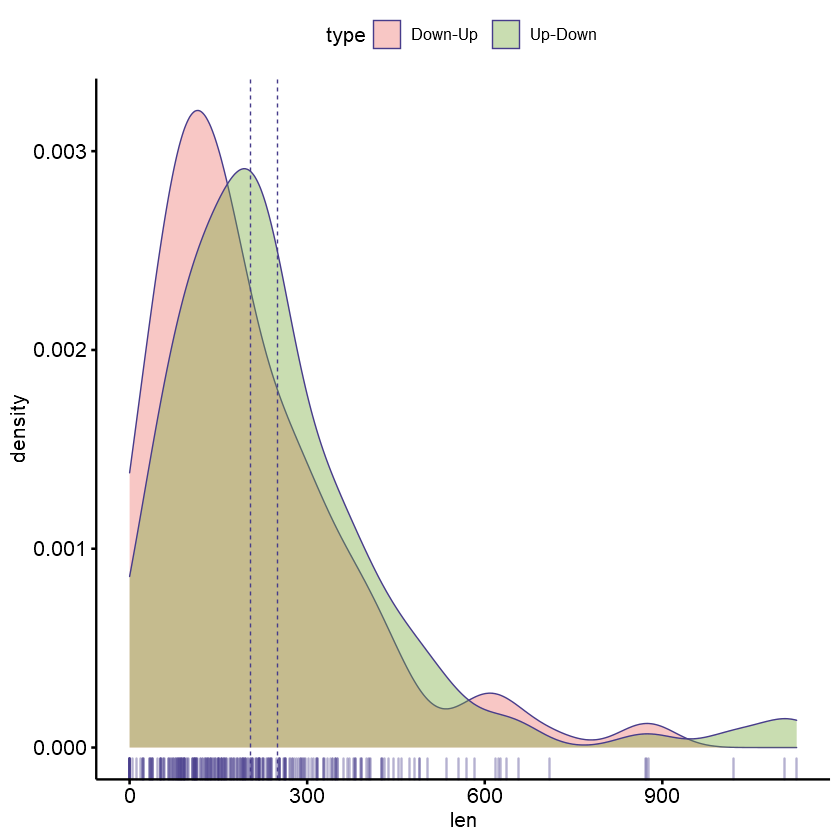

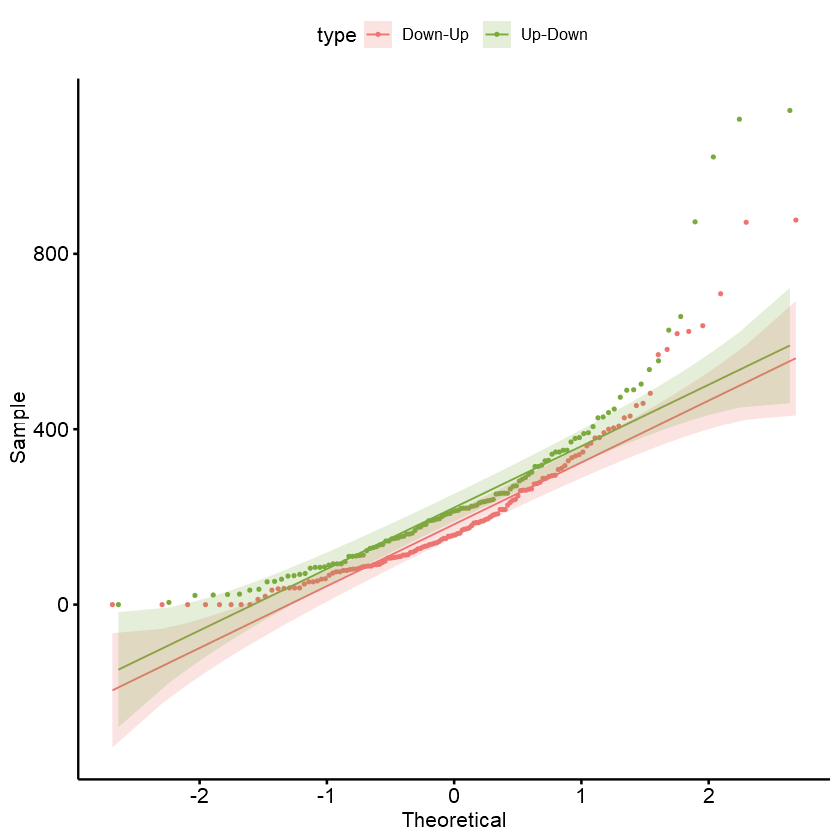

In [41]:
ggdensity(df_5utr, x = "len",
          add = "mean", rug = TRUE,
          fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4")

ggqqplot(df_5utr, x = "len",
        color = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.4)

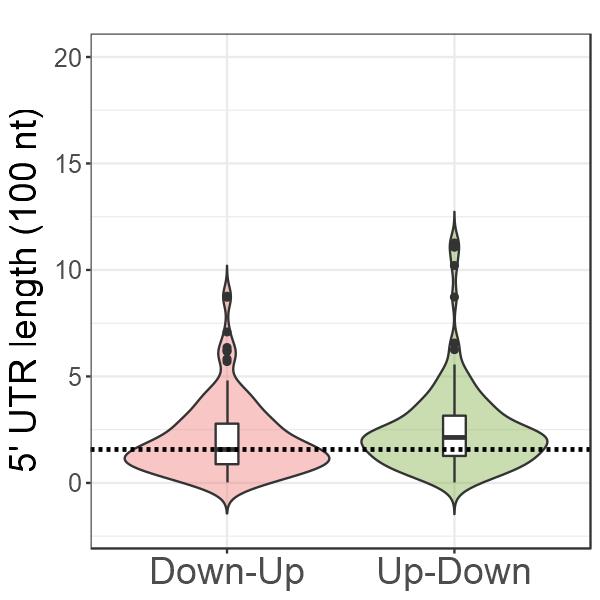

In [42]:
gg <- ggplot(df_5utr, aes(x=type, y=len, fill=type)) +
  geom_violin(trim=FALSE)+
  geom_boxplot(width=0.1, fill="white") + theme_bw() +
  theme(legend.position = "none") + 
  xlab(NULL) + 
  #ylab(expression("5' UTR"~log[2](length)~(nt))) + 
  ylab(expression("5' UTR length (100 nt)")) + 
  ggtitle('') +
  theme(plot.title=element_text(size=10),
      axis.text.x=element_text(size=22),
      axis.text.y=element_text(size=15, lineheight=0.9),
      axis.title.x=element_text(size=9),
      axis.title.y=element_text(size=22)) +
  scale_y_continuous(label=yscale_100, limit=c(-200,2000)) +
  geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),
             linetype="dashed", size=1, color = "black") +
  scale_fill_manual(values = 
      alpha(c('no'='#aaaaaa','Up-Down'='#7aaa3d', 'Down-Up'='#ed7470'), 0.4))

print_figure(gg, width=5, height=5,
    file=sprintf("Violin plot.%s.5utr length", condstr))

##### <font color="Orange">ggpubr violin plot with p-value

25%    50%    75% 
1.0075 1.8700 2.9350

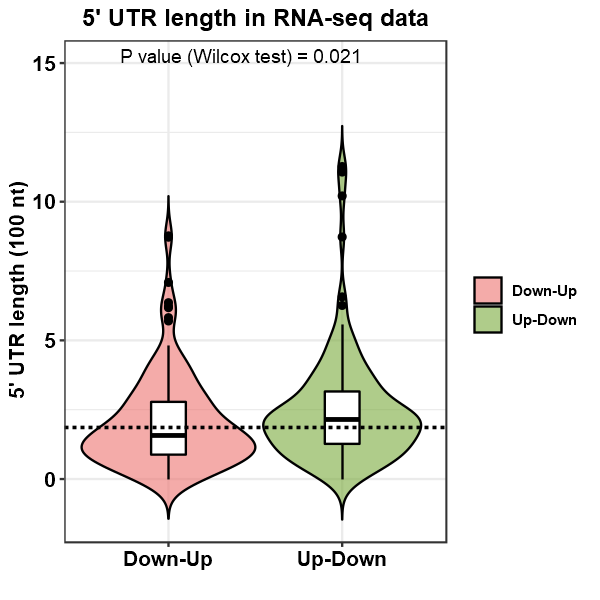

In [43]:
df_5utr_modified <- df_5utr %>%
mutate(len=len/100)
quantile_dnup_5utr <- quantile(df_5utr_modified$len, probs = c(0.25,0.5,0.75))
quantile_dnup_5utr

gg <- ggviolin(df_5utr_modified, x = "type", y = "len", 
         fill = "type", palette =c('#ed7470', '#7aaa3d'),alpha=0.6,
         add = c("boxplot"), add.params = list(fill = "white"),
         xlab="", ylab="5' UTR length (100 nt)",
         title="5' UTR length in RNA-seq data")+
labs(fill = "") +
theme_bw() +
theme(plot.title = element_text(color = "black", size = 14, face = "bold", hjust = 0.5),
    legend.text = element_text(color = "black"))+
font("legend.text", face = "bold")+ 
font("xy.text", size = 12, color = "black", face = "bold")+
font("ylab", size = 12, color = "black", face = "bold")+
stat_compare_means(method = "wilcox.test", label.y = 15, label.x.npc = "left", aes(label = paste("P value (Wilcox test) =", ..p.format..)))+
theme(legend.position = "right")+
geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),linetype="dashed", size=0.75, color = "black") 

print_figure(gg, width=5, height=5,
    file=sprintf("Violin plot P-value.%s.5utr length", condstr))

Warning message:
"Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session."


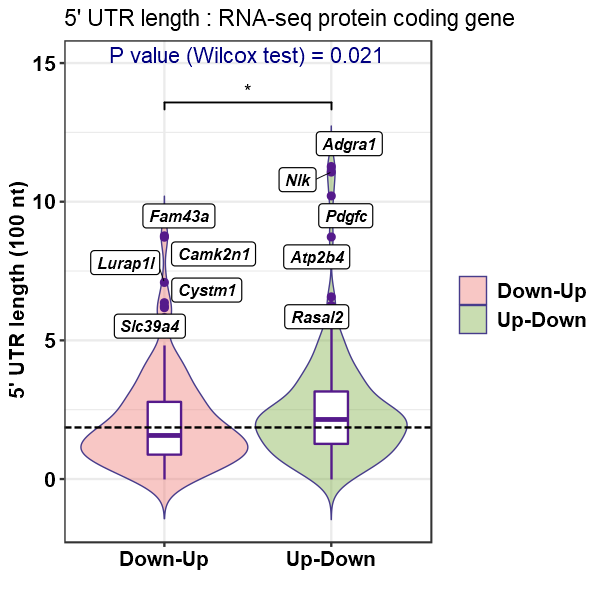

In [44]:
my_comparisons <- list( c("Up-Down", "Down-Up"))
p <- ggviolin(df_5utr_modified, x = "type", y = "len",
              fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4",
              add = c("boxplot"), add.params = list(fill = "white"),
              xlab="", ylab="5' UTR length (100 nt)",
              title = paste0("5' UTR length : ", condstr),
              label= "sym",label.select = list(top.up = 5),
              font.label = list(size = 10, face = "bold.italic"), repel = TRUE, label.rectangle=TRUE) +
labs(fill = "") +
theme_bw() +
theme(legend.text = element_text(color = "black"))+
font("legend.text", face = "bold", size = 12)+ 
font("xy.text", size = 12, color = "black", face = "bold")+
font("ylab", size = 12, color = "black", face = "bold")+ 
geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),
             linetype="longdash", size=0.5, color = "black") +
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", aes(label = ..p.signif..), na.rm = TRUE, bracket.size = 0.4, tip.length = 0.02, label.y=13) +
stat_compare_means(method = "wilcox.test", label.x.npc = "left", aes(label = paste("P value (Wilcox test) =", ..p.format..)), label.y = 15, na.rm = TRUE, size=4.5, color="navy")
p$layers[[2]]$aes_params$colour <- "purple4" ## Outlier spot and boxplot outer color


print_figure(p, width=5, height=5, file=sprintf("Violin plot P-value.%s.5utr length", condstr))
#stat_compare_means(comparisons = my_comparisons)

##### <font color="magenta"> Ribo-seq Down-Up Up-Down

In [45]:
condstr <- "Ribo-seq protein coding gene"

In [46]:
df_updn_5utr <- Transcript_UTR_Length.selected[Transcript_UTR_Length.selected$sym %in% TrGS2,] %>%
    mutate(type=rep("Up-Down"))
head(df_updn_5utr)
quantile_updn_5utr <- quantile(df_updn_5utr$len, probs = c(0.25,0.5,0.75))
quantile_updn_5utr

,sym,len,type
,<chr>,<int>,<chr>
85,Pdgfb,810,Up-Down
92,Itga5,237,Up-Down
107,Hk2,474,Up-Down
127,Rpa1,52,Up-Down
211,Calm1,279,Up-Down
247,Col18a1,270,Up-Down


25% 50% 75% 
100 200 311

In [47]:
df_dnup_5utr <- Transcript_UTR_Length.selected[Transcript_UTR_Length.selected$sym %in% TrGS4,] %>%
    mutate(type=rep("Down-Up"))
head(df_dnup_5utr)
quantile_dnup_5utr <- quantile(df_dnup_5utr$len, probs = c(0.25,0.5,0.75))
quantile_dnup_5utr

,sym,len,type
,<chr>,<int>,<chr>
28,Sdhd,23,Down-Up
227,Pfdn5,73,Down-Up
311,Chordc1,272,Down-Up
356,Bcap31,102,Down-Up
372,Bbc3,261,Down-Up
427,Ndufb2,41,Down-Up


25%   50%   75% 
 54.5 105.0 176.0

In [48]:
df_5utr <- rbind(df_dnup_5utr, df_updn_5utr)

yscale_100 <- function(x) {
  sprintf("%.0f", x/100)
}

<div class="alert-warning"> <b>Data distribution plot </b><br> </div>

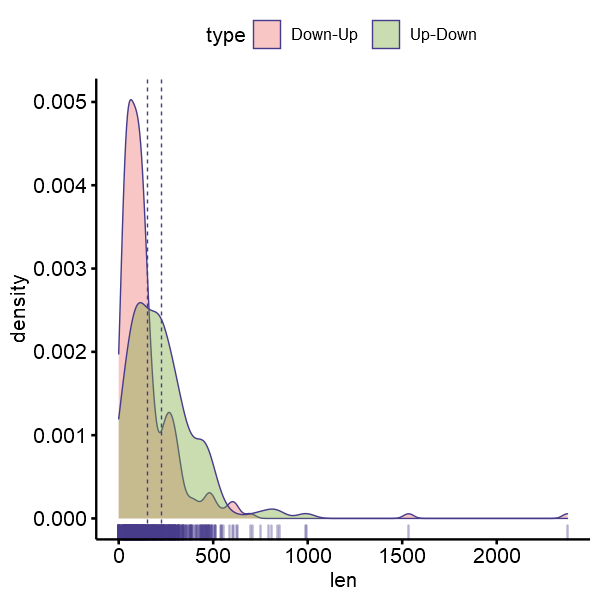

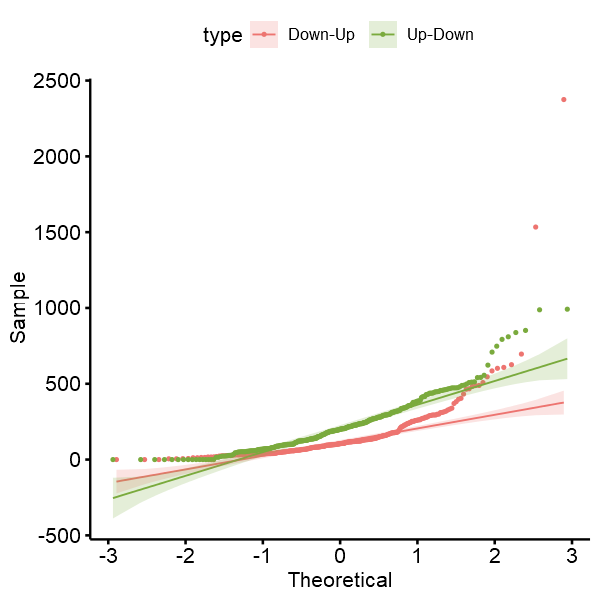

In [49]:
ggdensity(df_5utr, x = "len",
          add = "mean", rug = TRUE,
          fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4")

ggqqplot(df_5utr, x = "len",
        color = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.4)

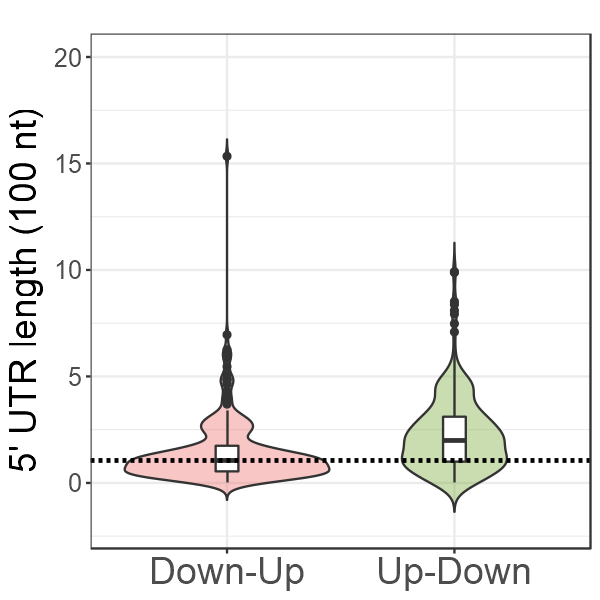

In [50]:
#TGS2 and TrGS5
gg <- ggplot(df_5utr, aes(x=type, y=len, fill=type)) +
  geom_violin(trim=FALSE)+
  geom_boxplot(width=0.1, fill="white") + theme_bw() +
  theme(legend.position = "none") + 
  xlab(NULL) + 
  #ylab(expression("5' UTR"~log[2](length)~(nt))) + 
  ylab(expression("5' UTR length (100 nt)")) + 
  ggtitle('') +
  theme(plot.title=element_text(size=10),
      axis.text.x=element_text(size=22),
      axis.text.y=element_text(size=15, lineheight=0.9),
      axis.title.x=element_text(size=9),
      axis.title.y=element_text(size=22)) +
  scale_y_continuous(label=yscale_100, limit=c(-200,2000)) +
  geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),
             linetype="dashed", size=1, color = "black") +
  scale_fill_manual(values = 
      alpha(c('no'='#aaaaaa','Up-Down'='#7aaa3d', 'Down-Up'='#ed7470'), 0.4))
print_figure(gg, width=5, height=5,
    file=sprintf("Violin plot.%s.reversible.5utr length", condstr))

##### <font color="Orange"> ggpubr violin plot with p-value

25%  50%  75% 
0.72 1.36 2.67

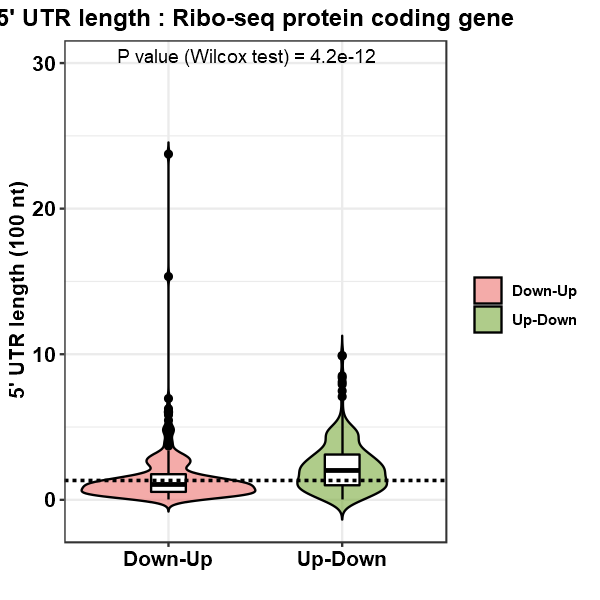

In [51]:
df_5utr_modified <- df_5utr %>%
mutate(len=len/100)
quantile_dnup_5utr <- quantile(df_5utr_modified$len, probs = c(0.25,0.5,0.75))
quantile_dnup_5utr

gg <- ggviolin(df_5utr_modified, x = "type", y = "len", 
         fill = "type", palette =c('#ed7470', '#7aaa3d'),alpha=0.6,
         add = c("boxplot"), add.params = list(fill = "white"),
         xlab="", ylab="5' UTR length (100 nt)",
         title= paste0("5' UTR length : ", condstr))+
labs(fill = "") +
theme_bw() +
theme(plot.title = element_text(color = "black", size = 14, face = "bold", hjust = 0.5),
    legend.text = element_text(color = "black"))+
font("legend.text", face = "bold")+ 
font("xy.text", size = 12, color = "black", face = "bold")+
font("ylab", size = 12, color = "black", face = "bold")+
stat_compare_means(method = "wilcox.test", label.y = 30, label.x.npc = "left", aes(label = paste("P value (Wilcox test) =", ..p.format..)))+
theme(legend.position = "right")+
geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),linetype="dashed", size=0.75, color = "black") 

print_figure(gg, width=5, height=5,
    file=sprintf("Violin plot P-value.%s.5utr length", condstr))

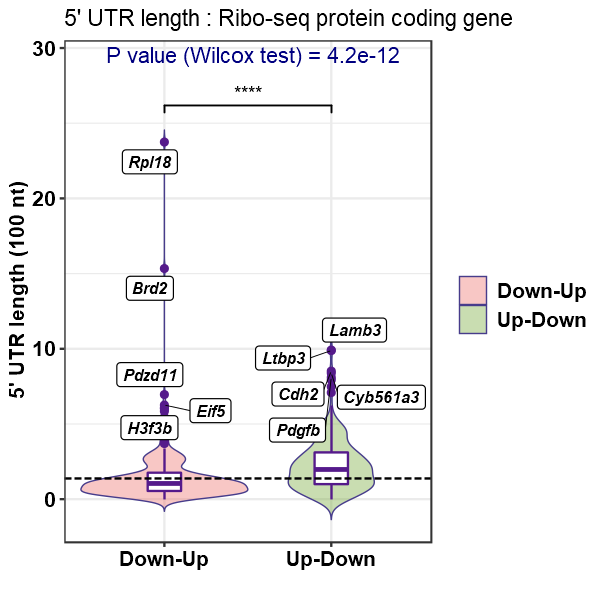

In [52]:
my_comparisons <- list( c("Up-Down", "Down-Up"))
p <- ggviolin(df_5utr_modified, x = "type", y = "len",
              fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4",
              add = c("boxplot"), add.params = list(fill = "white"),
              xlab="", ylab="5' UTR length (100 nt)",
              title = paste0("5' UTR length : ", condstr),
              label= "sym",label.select = list(top.up = 5),
              font.label = list(size = 10, face = "bold.italic"), repel = TRUE, label.rectangle=TRUE) +
labs(fill = "") +
theme_bw() +
theme(legend.text = element_text(color = "black"))+
font("legend.text", face = "bold", size = 12)+ 
font("xy.text", size = 12, color = "black", face = "bold")+
font("ylab", size = 12, color = "black", face = "bold")+ 
geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),
             linetype="longdash", size=0.5, color = "black") +
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", aes(label = ..p.signif..), na.rm = TRUE, bracket.size = 0.4, tip.length = 0.02, label.y=25) +
stat_compare_means(method = "wilcox.test", label.x.npc = "left", aes(label = paste("P value (Wilcox test) =", ..p.format..)), label.y = 29, na.rm = TRUE, size=4.5, color="navy")
p$layers[[2]]$aes_params$colour <- "purple4" ## Outlier spot and boxplot outer color

print_figure(p, width=5, height=5,
    file=sprintf("Violin plot P-value %s.5utr length", condstr))
#stat_compare_means(comparisons = my_comparisons)

## <font color="blue"> Violin plot for first exon length

In [53]:
exons.selected <- exons %>%
    filter(GeneType == "protein_coding") %>%
    ungroup() %>%
    select(Symbol, Length) %>%
    rename(sym=Symbol, len=Length) 
    
head(exons.selected)

sym,len
<chr>,<int>
Pcmtd1,297
Cdh7,249
Exo1,276
Gm38100,1360
Uxs1,186
Cdh19,117


#### <font color="magenta"> RNA-seq Down-Up Up-Down

In [54]:
condstr <- "RNA-seq protein coding gene"

In [55]:
df_updn_1stExon <- exons.selected[exons.selected$sym %in% TGS2,] %>%
    mutate(type=rep("Up-Down"))
head(df_updn_1stExon)
quantile_df_updn_1stExon <- quantile(df_updn_1stExon$len, probs = c(0.25,0.5,0.75))
quantile_df_updn_1stExon

sym,len,type
<chr>,<int>,<chr>
Rasal2,859,Up-Down
Nrp2,993,Up-Down
Gpr161,100,Up-Down
Atp2b4,405,Up-Down
Lgr6,348,Up-Down
Nav1,1151,Up-Down


25%   50%   75% 
175.0 263.5 410.5

In [56]:
df_dnup_1stExon <- exons.selected[exons.selected$sym %in% TrGS4,] %>%
    mutate(type=rep("Down-Up"))
head(df_dnup_1stExon)
quantile_df_dnup_1stExon <- quantile(df_dnup_1stExon$len, probs = c(0.25,0.5,0.75))
quantile_df_dnup_1stExon

sym,len,type
<chr>,<int>,<chr>
Lactb2,218,Down-Up
Atf3,248,Down-Up
Btg2,209,Down-Up
Cyb5r1,241,Down-Up
Cox5b,241,Down-Up
Arl8a,277,Down-Up


25%    50%    75% 
107.75 171.50 259.00

In [57]:
df_1stExon <- rbind(df_dnup_1stExon, df_updn_1stExon)
df_1stExon_modified <- df_1stExon %>%
mutate(len=len/100)
quantile_dnup_5utr <- quantile(df_1stExon_modified$len, probs = c(0.25,0.5,0.75))
quantile_dnup_5utr

25%    50%    75% 
1.1775 1.9650 3.0800

<div class="alert-warning"> <b>Data distribution plot </b><br> </div>

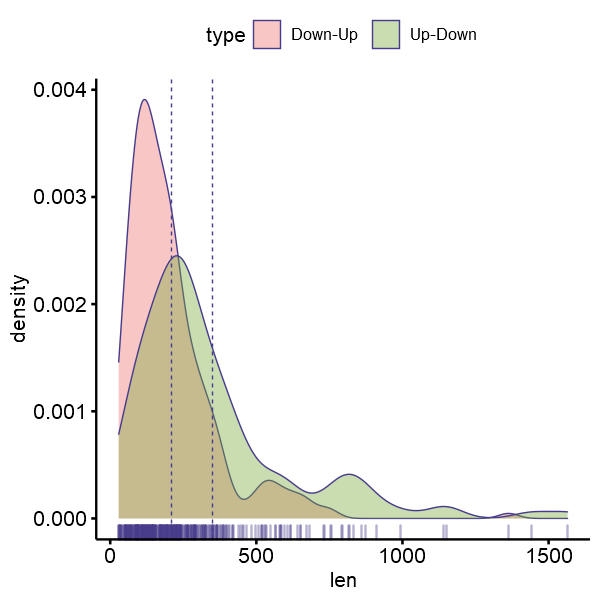

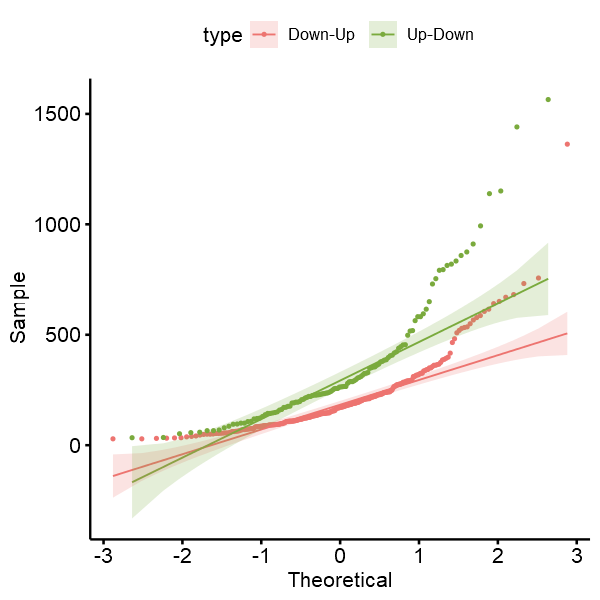

In [58]:
ggdensity(df_1stExon, x = "len",
          add = "mean", rug = TRUE,
          fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4")

ggqqplot(df_1stExon, x = "len",
        color = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.4)

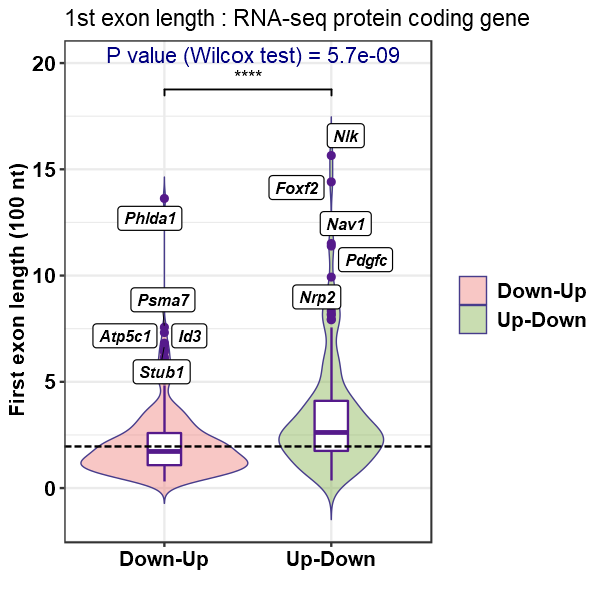

In [59]:
my_comparisons <- list( c("Up-Down", "Down-Up"))
p <- ggviolin(df_1stExon_modified, x = "type", y = "len",
              fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4",
              add = c("boxplot"), add.params = list(fill = "white"),
              xlab="", ylab="First exon length (100 nt)",
              title = paste0("1st exon length : ", condstr),
              label= "sym",label.select = list(top.up = 5),
              font.label = list(size = 10, face = "bold.italic", color="black"), repel = TRUE, label.rectangle=TRUE) +
labs(fill = "") +
theme_bw() +
theme(legend.text = element_text(color = "black"))+
font("legend.text", face = "bold", size = 12)+ 
font("xy.text", size = 12, color = "black", face = "bold")+
font("ylab", size = 12, color = "black", face = "bold")+ 
geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),
             linetype="longdash", size=0.5, color = "black") +
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", aes(label = ..p.signif..), na.rm = TRUE, bracket.size = 0.4, tip.length = 0.02, label.y=18) +
stat_compare_means(method = "wilcox.test", label.x.npc = "left", aes(label = paste("P value (Wilcox test) =", ..p.format..)), label.y = 20, na.rm = TRUE, size=4.5, color="navy")
p$layers[[2]]$aes_params$colour <- "purple4" ## Outlier spot and boxplot outer color


print_figure(p, width=5, height=5,
    file=sprintf("Violin plot P-value %s.1st exon length", condstr))

#### <font color="magenta"> Ribo-seq Down-Up Up-Down

In [60]:
condstr <- "Ribo-seq protein coding gene"

In [61]:
df_updn_1stExon <- exons.selected[exons.selected$sym %in% TrGS2,] %>%
    mutate(type=rep("Up-Down"))
head(df_updn_1stExon)
quantile_df_updn_1stExon <- quantile(df_updn_1stExon$len, probs = c(0.25,0.5,0.75))
quantile_df_updn_1stExon

sym,len,type
<chr>,<int>,<chr>
Qsox1,364,Up-Down
Clasp1,464,Up-Down
Rdh10,533,Up-Down
Pkhd1,154,Up-Down
Lamb3,153,Up-Down
Selp,126,Up-Down


25%   50%   75% 
144.5 249.0 401.0

In [62]:
df_dnup_1stExon <- exons.selected[exons.selected$sym %in% TrGS4,] %>%
    mutate(type=rep("Down-Up"))
head(df_dnup_1stExon)
quantile_df_dnup_1stExon <- quantile(df_dnup_1stExon$len, probs = c(0.25,0.5,0.75))
quantile_df_dnup_1stExon

sym,len,type
<chr>,<int>,<chr>
Lactb2,218,Down-Up
Atf3,248,Down-Up
Btg2,209,Down-Up
Cyb5r1,241,Down-Up
Cox5b,241,Down-Up
Arl8a,277,Down-Up


25%    50%    75% 
107.75 171.50 259.00

In [63]:
df_1stExon <- rbind(df_dnup_1stExon, df_updn_1stExon)
df_1stExon_modified <- df_1stExon %>%
mutate(len=len/100)
quantile_dnup_5utr <- quantile(df_1stExon_modified$len, probs = c(0.25,0.5,0.75))
quantile_dnup_5utr

25%   50%   75% 
1.205 2.070 3.370

<div class="alert-warning"> <b>Data distribution plot </b><br> </div>

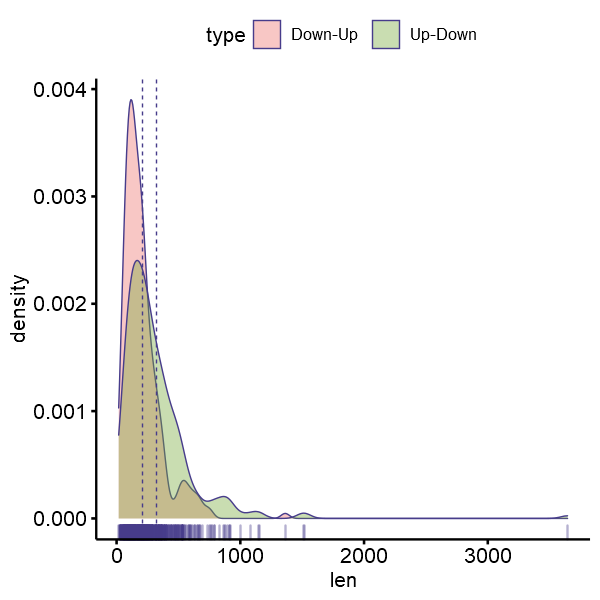

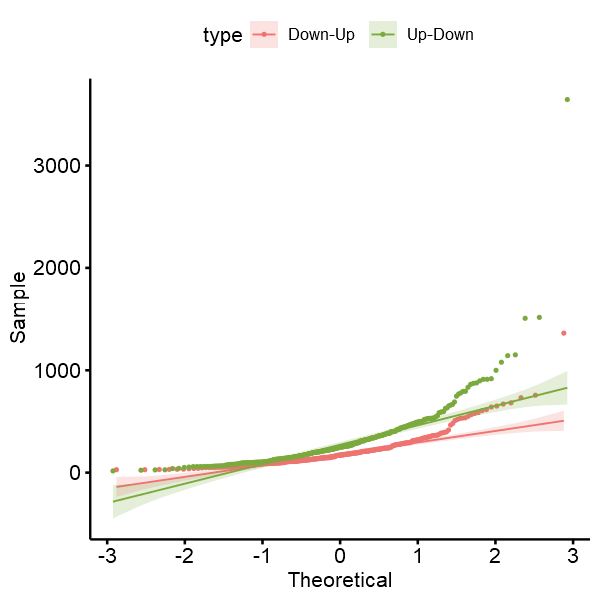

In [64]:
ggdensity(df_1stExon, x = "len",
          add = "mean", rug = TRUE,
          fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4")

ggqqplot(df_1stExon, x = "len",
        color = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.4)

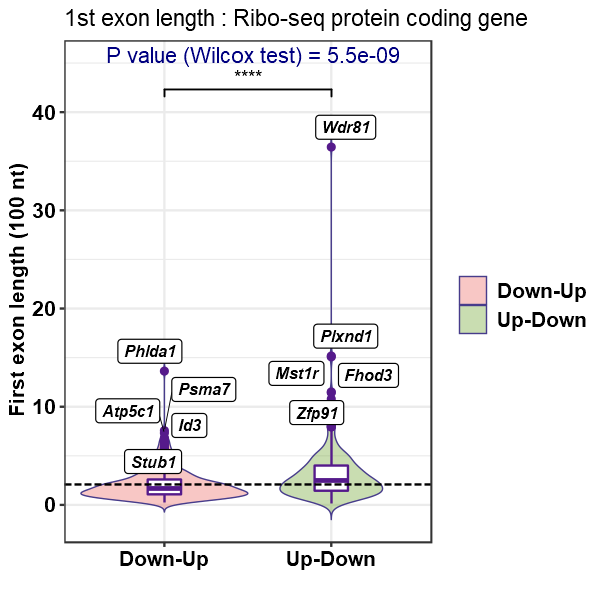

In [65]:
my_comparisons <- list( c("Up-Down", "Down-Up"))
p <- ggviolin(df_1stExon_modified, x = "type", y = "len",
              fill = "type", palette =c('#ed7470', '#7aaa3d'), alpha=0.4, size=0.3, color="slateblue4",
              add = c("boxplot"), add.params = list(fill = "white"),
              xlab="", ylab="First exon length (100 nt)",
              title = paste0("1st exon length : ", condstr),
              label= "sym",label.select = list(top.up = 5),
              font.label = list(size = 10, face = "bold.italic", color="black"), repel = TRUE, label.rectangle=TRUE) +
labs(fill = "") +
theme_bw() +
theme(legend.text = element_text(color = "black"))+
font("legend.text", face = "bold", size = 12)+ 
font("xy.text", size = 12, color = "black", face = "bold")+
font("ylab", size = 12, color = "black", face = "bold")+ 
geom_hline(yintercept=c(quantile_dnup_5utr[["50%"]]),
             linetype="longdash", size=0.5, color = "black") +
stat_compare_means(comparisons = my_comparisons, method = "wilcox.test", aes(label = ..p.signif..), na.rm = TRUE, bracket.size = 0.4, tip.length = 0.02, label.y=40.5) +
stat_compare_means(method = "wilcox.test", label.x.npc = "left", aes(label = paste("P value (Wilcox test) =", ..p.format..)), label.y = 45, na.rm = TRUE, size=4.5, color="navy")
p$layers[[2]]$aes_params$colour <- "purple4" ## Outlier spot and boxplot outer color

print_figure(p, width=5, height=5,
    file=sprintf("Violin plot P-value %s.1st exon length", condstr))